# MA934  Numerical Methods - Workbook 2

In [1]:
using Plots
font1 = Plots.font("Helvetica", 12)
pyplot(guidefont=font1, xtickfont=font1, ytickfont=font1, legendfont=font1)
pyplot()
using LaTeXStrings
include("MODULES/kvpair.jl")
include("MODULES/llist.jl")
include("MODULES/ftree.jl")

buildFTree (generic function with 1 method)

## Question 1: Linear search using a linked list

The file KVPair.jl defines a simple data structure to represent an (Int64, Float64) key-value pair. 

The file LList.jl defines a linked list that stores a KVPair at each node. Many languages have a keyword NULL. A pointer to any object can take the value NULL to indicate that it doesn't point to anything. NULL is often used to denote the end of a list, the leaves of a tree etc. Julia does not support NULL pointers. This causes a difficulty in implementing recursive data structures. Instead Julia provides a parametric data type Nullable{T} to represent missing values. It is possible to use Nullable types to define recursive data structures although some of the resulting definitions are a bit clumsy. I'm not sure that this is the canonical way to implement structural recursion in Julia. 

The following points are important:

* if a variable has type Nullable{T} then it can either contain a value of type T or nothing (ie a missing value). 
* the function isnull(x) checks whether a nullable type x has a value or not. 
* the function get(x) returns the actual value (of type T) contained in a nullable type x.

Much more information can be found at https://docs.julialang.org/en/stable/manual/types/

The function 

> buildLList(dataArray::Array{KVPair, 1})

takes an array of KVPair objects as input and returns an LList containing these KVPairs. This is illustrated in the code below.

1. Write a recursive function that traverses the list and prints out the key-value pairs stored in it. Check that your function works.
2. Write a function search(list::Nullable{LList}, k::Int64) that searches an LList for the key k and returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. Verify that your function works.
3. Use Julia's @timed macro to measure how the typical computational cost of your search() function grows with the length of the list. 

1. We first use the function "create_KVPairs" which takes the desired number of key value pairs as an input argument and outputs an array of KVPairs. The function "buildLList" then uses the array of KVPairs to build a list. The recursive function "list_traverse" takes a list as an input argument and prints the key of every key value pair. As the output is in ascending order, we know (due to the construction of the list) that the function is working correctly.

In [2]:
function create_KVPairs(n)
    seed = 1235 
    rng = MersenneTwister(seed)
    X = rand(rng, n)
    values = Array{KVPair}(n)
    for i in 1:n
        values[i] = KVPair(i,X[i])
    end
    return values
end

create_KVPairs (generic function with 1 method)

In [3]:
values=create_KVPairs(20)
L=buildLList(values)

Nullable{LList}(LList(KVPair(1,0.0951588),LList(KVPair(2,0.270898),LList(KVPair(3,0.906315),LList(KVPair(4,0.833585),LList(KVPair(5,0.945055),LList(KVPair(6,0.443669),LList(KVPair(7,0.904577),LList(KVPair(8,0.941598),LList(KVPair(9,0.0375897),LList(KVPair(10,0.996082),LList(KVPair(11,0.238817),LList(KVPair(12,0.180708),LList(KVPair(13,0.630896),LList(KVPair(14,0.268177),LList(KVPair(15,0.719386),LList(KVPair(16,0.923945),LList(KVPair(17,0.540168),LList(KVPair(18,0.656086),LList(KVPair(19,0.748725),LList(KVPair(20,0.542957),#NULL)))))))))))))))))))))

In [4]:
function list_traverse(LList)
    L=LList
    k=get(L).data
    k1=k.key
    println(k1)
    L=get(L).next
    if isnull(L)==false
         list_traverse(L)
    end    
end 

list_traverse (generic function with 1 method)

In [5]:
list_traverse(L)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


2. The recursive function "list_search" takes a list and an integer as input values and returns the matching KVPair. We manually check that this function works. 

In [6]:
function list_search(LList, a::Int64)
    L=LList
    k=get(L).data
    k1=k.key
    if (k1 == a)
        return(k)
    else
        L=get(L).next
        list_search(L,a)    
    end
end

list_search (generic function with 1 method)

In [7]:
##example:
println(list_search(L,3))

KVPair(3,0.9063154415086963)


In [8]:
working=true
for i=1:length(values)    
    if (list_search(L,i).key != values[i].key)
        println("The function does not work correctly.")
        working=false
    elseif (list_search(L,i).value != values[i].value)
        println("The function does not work correctly.")
        working=false
    end
end
if working==true
    println("The function works correctly.")    
end

The function works correctly.


Now we want to evaluate how the computational cost of the "list_search" function grows with the length of the list. To do that, we consider lists with 1 to 600 KVPairs. For each list length we search once for every possible key. We then take the mean of the needed times for these searches as y-value for the associated list length. 


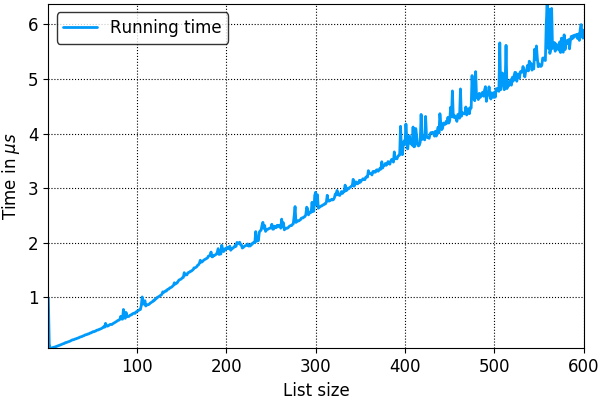

In [29]:
n=600
Time=zeros(n)
for i=1:n
    Sub_time=zeros(i)
    values=create_KVPairs(i)
    L=buildLList(values)
    
    for j=1:i
    Sub_time[j]=(@timed list_search(L,j))[2]
    end
    Time[i]=mean(Sub_time)
end

x=1:1:n
plot(x,Time*1e6, linewidth=2, label="Running time",xlabel="List size",ylabel=L"Time in $\mu s$")

The plot suggests that the computational effort grows linearly. 

## Question 2: Interval membership

The problem of interval membership is the following: given a set of contiguous intervals, 

$\left\{[x_0, x_1), [x_1, x_2), \ldots, [x_{n-2}, x_{n-1}), [x_{n-1}, x_n)\right\}$

spanning the interval $[x_1, x_n)$ and given a random number $x \in [x_1, x_n)$, determine the interval in which $x$ lies. The standard numerical algorithm for stochastic simulation of continuous-time Markov processes (eg birth-death process, contact process, SIR model etc) requires solving an interval membership problem at each time step. It is therefore important to be able to solve it efficiently. Note, we cannot assume that all intervals are the same length.

We can solve the interval membership problem with $n$ interval by a variant of linear search in $O(n)$ time. We will demonstrate below that it can be solved in $O(\log\, n)$ time using a variant of a data structure known as a Fenwick tree.

**1)** Use Julia's random number generator to generate $n$ random interval lengths, $y_1, y_2, \ldots, y_n$ between 0 and 1 as shown: 

In [10]:
# Set number of intervals
n=10
# Seed for random number generator. 
# You should choose your own seed so that everyone does not end up with the same random sequences
seed = 1235 
# Initialise the random number generator
rng = MersenneTwister(seed)
# Generate a sample of n uniform random numbers in the interval [0,1]
X = rand(rng, n);

The corresponding interval membership problem is constructed from the partial sums:
$$x_i = \sum_{j=1}^i y_j, \ \ \ \ \ i=1,2,\ldots n.$$ 
Using the objects defined in KVPair.jl and LList.jl, create an array of key-value pairs, $(i, x_i)$, associating each interval with the corresponding partial sum and store this array in a linked list. Print the list for a small value of $n$to verify that it works.

**2)** Modify the search function you wrote above to write a recursive function

$$\text{intervalmembership(list::Nullable{LList}, x::Float64)}$$

that takes the LList containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to measure how the typical computational cost grows with $n$. 

**3)** The file FTree.jl defines a data structure implementing a variant of a Fenwick tree that can solve the interval membership problem as described in the lectures/notes. The function 

$$\text{buildFTree(T::Nullable{FTree}, dataArray::Array{KVPair, 1})}$$

takes the array of KVPairs containing the interval lengths as input, recursively constructs the tree and returns the FTree containing the correct key-value pairs (note a key of -1 is assigned to all non-leaf nodes).

In [11]:
n=5
X = rand(rng, 5)
# Now calculate the array of partial sums
values = Array{KVPair}(5)
for i in 1:n
    values[i] = KVPair(i,X[i])
end
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T, values)

Nullable{FTree}(FTree(KVPair(-1,2.03798),FTree(KVPair(-1,0.419524),FTree(KVPair(1,0.238817),#NULL,#NULL),FTree(KVPair(2,0.180708),#NULL,#NULL)),FTree(KVPair(-1,1.61846),FTree(KVPair(3,0.630896),#NULL,#NULL),FTree(KVPair(-1,0.987563),FTree(KVPair(4,0.268177),#NULL,#NULL),FTree(KVPair(5,0.719386),#NULL,#NULL)))))

Write a recursive function

$$\text{intervalmembership(FT::Nullable{FTree}, x::Float64)}$$

that takes the FTree containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as 
inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to compare how the typical computational compares to the above linear search version. Note it can sometimes be difficult to directly measure $O(\log\, n)$ growth in computation time since the problem size needs to become very large to register appreciable run times.

1. The function "create_KVPairs_partial_sums" takes the desired number of key value pairs as input argument. It then generates a random array X of length n and calculates the value of key value pair i as the cumulative sum of the first i entries of the array X. We then use the function "buildLList" to turn the generated array into a list.

In [12]:
#1

function create_KVPairs_partial_sums(n)
    X = rand(rng, n)
    values = Array{KVPair}(n)
    for i in 1:n
        x=sum(X[1:i])
        values[i]=KVPair(i,x)
    end
    return values
end

create_KVPairs_partial_sums (generic function with 1 method)

In [13]:
values=create_KVPairs_partial_sums(10)
L=buildLList(values)

Nullable{LList}(LList(KVPair(1,0.923945),LList(KVPair(2,1.46411),LList(KVPair(3,2.1202),LList(KVPair(4,2.86892),LList(KVPair(5,3.41188),LList(KVPair(6,3.53085),LList(KVPair(7,4.44611),LList(KVPair(8,4.98996),LList(KVPair(9,5.36157),LList(KVPair(10,5.51694),#NULL)))))))))))

To check that the function works, we print the values of the list and the cumulative sums of the random array X for a small value of n (n=10). 

In [14]:
for i=1:length(values)
   println(list_search(L,i).value)
    println(values[i].value) 
end

0.9239451731818169
0.9239451731818169
1.4641129285557852
1.4641129285557852
2.1201993122841496
2.1201993122841496
2.868924054820794
2.868924054820794
3.4118809445163203
3.4118809445163203
3.5308476015221473
3.5308476015221473
4.446113514697531
4.446113514697531
4.989957995608647
4.989957995608647
5.3615689292722415
5.3615689292722415
5.516943921448496
5.516943921448496


2. We introduce the recursive function "intervalmembership" that takes a list and a Float64 as input arguments. We then compare x to the value of the key value pair at the top of the list. If the input value x (Float64) is smaller than the value of the key value, the value x is in the corresponing interval and the search is finished. Else we move to the next element of the list and repeat the search. We check for a small value of n (n=10) that the function works.

In [15]:
#2
function intervalmembership(list::Nullable{LList},x::Float64)
    L=list
    k=get(L).data
    k2=k.value
    if (x < k2)
        return(k)
    else
        L=get(L).next
        intervalmembership(L,x)
        
    end
end

intervalmembership (generic function with 1 method)

In [16]:
x=2.0
println(x)
println(intervalmembership(L,x))
println(values)

2.0
KVPair(3,2.1201993122841496)
KVPair[KVPair(1,0.923945),KVPair(2,1.46411),KVPair(3,2.1202),KVPair(4,2.86892),KVPair(5,3.41188),KVPair(6,3.53085),KVPair(7,4.44611),KVPair(8,4.98996),KVPair(9,5.36157),KVPair(10,5.51694)]


Finally, we want to explore how the computational effort increases with the length of the list. We fix the maximal list length n and the number of repetitions per list length m. For every list length between one and 600 we use the function "create_KVPairs_partial_sums" and the function "buildLList" to generate a random list, create a number in the correct range and use the function "intervalmembership". We then repeat this process m times for each intervall length and measure the time at each iteration. We take the mean of all iterations and assign it as a y-value to the corresponding list length. 


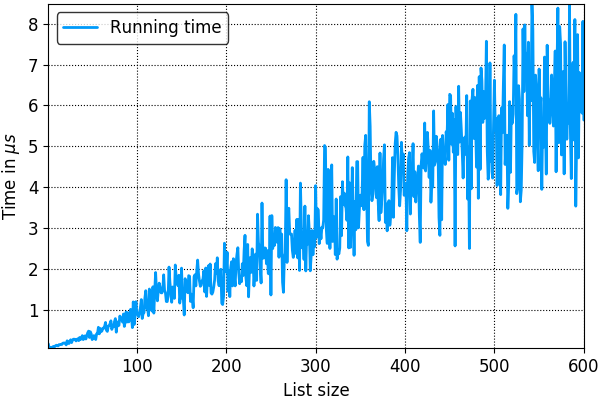

In [31]:
n=600
m=10
Time=zeros(n)
for i=1:n
    Sub_time=zeros(m)
     for j=1:m
        values=create_KVPairs_partial_sums(i)
        L=buildLList( values)
        x=rand()*values[i].value
        Sub_time[j]=(@timed intervalmembership(L,x))[2];
      end
    Time[i]=mean(Sub_time)
end

x=1:1:n
plot(x,Time*1e6, linewidth=2, label="Running time",xlabel="List size",ylabel=L"Time in $\mu s$")

The plot suggests that the computational effort increases linearly. 

3. We can use the function "buildFTree" to turn a list in a fenwick tree. We want to use the fenwick tree to solve the interval membership problem. To do that we implement the fast search algorithm as a function "intervalmembership_tree". It gives back the intervalmembership of a value x which is drawn from the correct range.  

In [19]:
#3
function intervalmembership_tree(FT::Nullable{FTree},x::Float64)
    l=get(FT).left
    r=get(FT).right
    k=get(FT).data
    if (isnull(l)==true && isnull(r)==true)
        return(k)
        elseif (isnull(l) ==false && x<get(l).data.value)
            intervalmembership_tree(l,x)
        elseif (isnull(r)==false)
            x=x-get(l).data.value
            intervalmembership_tree(r,x)
    end
end

intervalmembership_tree (generic function with 1 method)

We build a fenwick tree and check for a small value of n (n=10) that the function works, using the function "intervallmembership" we defined above.

In [20]:
function create_list_sumlist(n)
    X = rand(rng, n)
    values = Array{KVPair}(n)
    sum_values= Array{KVPair}(n)
    for i in 1:n
        values[i] = KVPair(i,X[i])
        s=sum(X[1:i])
        sum_values[i]=KVPair(i,s)
    end
    return values,sum_values
end

create_list_sumlist (generic function with 1 method)

In [21]:
lists=create_list_sumlist(10)
L=buildLList(lists[2])
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T, lists[1])
C=lists[2]

## check 5 times 

for i=1:5
    y=rand()*C[i].value
    println(y)
    println(intervalmembership(L,y))
    println(intervalmembership_tree(T,y))
end 

0.695937043715673
KVPair(1,0.7059616022001443)
KVPair(1,0.7059616022001443)
0.4602380467810689
KVPair(1,0.7059616022001443)
KVPair(1,0.7059616022001443)
0.2697434609407751
KVPair(1,0.7059616022001443)
KVPair(1,0.7059616022001443)
1.3541370113534255
KVPair(3,1.43092698708015)
KVPair(3,0.40031734183020395)
0.5776837205040259
KVPair(1,0.7059616022001443)
KVPair(1,0.7059616022001443)


Our experiments for small n suggest that the function works correctly. We now want to find out how the computational effort of the fenwick tree method for solving the interval problem changes when we increase the size of the input list (and therefore the size of the tree). We again fix a maximal list size n and a number of repetitions per list size m. We fix a list size, generate a tree, pick a random number from the correct range and compute the needed time for every iteration. We then take the mean of the needed running times and assign it as the y-value for the associated list size.


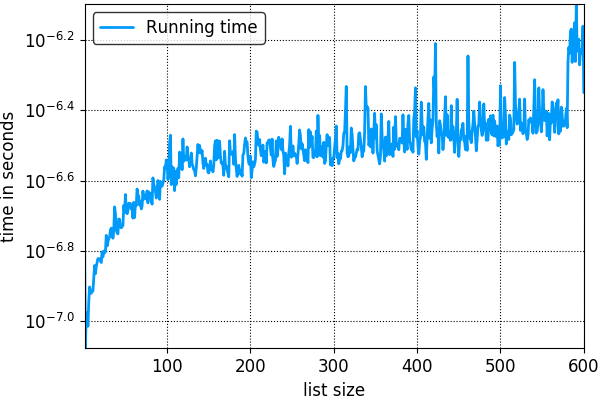

In [32]:
n=600
m=10
Time=zeros(n)
for i=1:n
    Sub_time=zeros(m)
     for j=1:m
    values=create_KVPairs(i)
    L=buildLList(values);
    T = Nullable{FTree}(FTree(KVPair(0,0.0)));
    T=buildFTree(T, values);    
    y=rand()*values[i].value
       Sub_time[j]=(@timed intervalmembership_tree(T,y);)[2]
      end
    Time[i]=mean(Sub_time)
end

x=1:1:n
plot(x,Time, linewidth=2, label="Running time",xlabel="list size",ylabel="time in seconds",yscale=:log10)

We're choosing to look at a lin/log plot to get a clearer picture of the function. It suggests that the computational effort increases logarithmically. The spikes seen in the plot are due to the randomness in the choise of the lists and desired values. For big list sizes, the second method is much faster than the first one. To emphasize this, we run both methods at the same time and instead of plotting the individual running times of both we plot the difference of the running times.


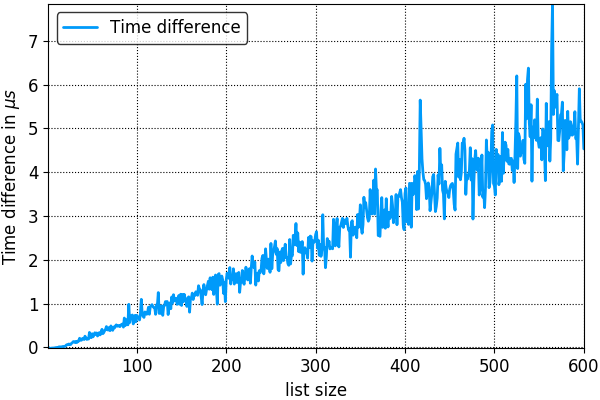

In [64]:
n=600
m=50
Time=zeros(n)
for i=1:n
    Sub_time=zeros(m)
    Sub_time_tree=zeros(m)
    for j=1:m
        lists=create_list_sumlist(i)
        L=buildLList(lists[2])
        T = Nullable{FTree}(FTree(KVPair(0,0.0)))
        T=buildFTree(T, lists[1])
        C=lists[2]
        y=rand()*C[i].value
    
        Sub_time[j]= (@timed intervalmembership(L,y);)[2]
        Sub_time_tree[j]=(@timed intervalmembership_tree(T,y);)[2]
    end
    Time[i]=mean(Sub_time)-mean(Sub_time_tree)
end

x=1:1:n
plot(x,Time*1e6, linewidth=2, label="Time difference",xlabel="list size",ylabel=L"Time difference in $\mu s$")

The time difference is growing linearly, therefore the second method is much faster than the first one. 

## Question 3: Gillespie algorithm for heterogeneous diffusion

The Gillespie algorithm is a dynamic Monte Carlo algorithm that generates statistically correct realisations of a continous time Markov process. See https://en.wikipedia.org/wiki/Gillespie_algorithm It is used heavily in stochastic simulation of chemical and biological reaction networks and population dynamics. In this question we use it to simulate one-dimensional diffusion of heterogeneous particles whose diffusion constants are independently drawn from an exponential distribution.

The basic idea of the algorithm is as follows
1. Create a list $\left\{(i, r_i), i=1,\ldots M\right\}$,  of all possible transitions (events), $i$, that can occur in the system and the corresponding transition rates, $r_i$.
2. Calculate the total rate
$$R = \sum_{i=1}^M r_i$$
and divide the interval $[0, R]$ into $M$ intervals whose lengths are given by the $r_i$.
3. Generate a uniform random number in the range $[0,R]$ and determine which interval it falls in. 
4. Perform the corresponding transition and update the time variable by an amount $\Delta t = 1/R$.
5. Repeat until the desired simulation time is reached.

To be concrete, suppose with have $N$ particles on the interval $[-L, L]$ initially located at $x=0$. Each particle can hop a distance $\Delta x$ to the left or to the right with equal probability. The rate of hopping is initially considered to be the same for all particles:

$$ r_i = \frac{D}{2}\,\frac{1}{(\Delta x)^2} $$

This choice ensures that in the continous limit ($\Delta x \to 0$, $N\to \infty$), the density of particles $c(x,t)$ on the line will satisfy the usual diffusion equation with diffusion coefficient $D$ (recall MA933):

$$ \frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}$$

with initial condition $c(x,0) = \delta(x)$.

The steps of the algorithm then correspond to the following:
1. There are $M= 2 N$ possible transitions at each step: each of $N$ particles can hop a distance $\Delta x$ either left or right with the above rates. We index them as follows: events k=1:N correspond to particle k hopping to the right, events k=N+1:2N correspond to particle k-N hopping to the left.
2. The total rate is 
$$ R = \frac{D N}{(\Delta x)^2}.$$
3. Generate a uniform random number in the range $[0,R]$ and determine the index $k$ of particle to move and the direction.
4. Update the position of particle $k$ accordingly.
5. Repeat.

The following piece of code implements the Gillespie algorithm for N=100, L=10, $\Delta x = 0.1$ and $D=1$, converts the particle positions to particle density and compares to the solution of the diffusion equation on an unbounded domain at t=1 (we assume that L=10 is far enough from zero to be considered unbounded):

$$c(x, t) = \frac{1}{\sqrt{2 \pi D t}}\, \exp [-\frac{1}{2}\frac{x^2}{D t} ]$$


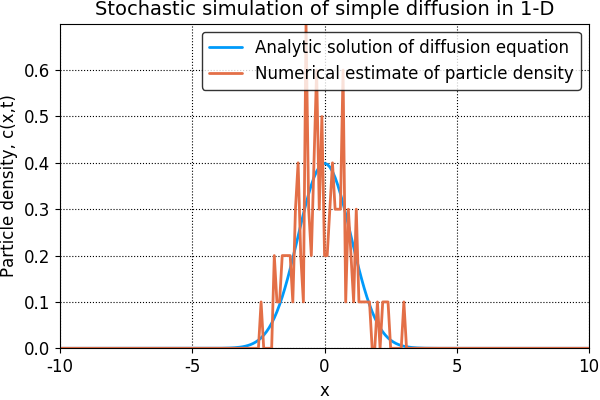

In [42]:
L=10.0
N=100
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y =zeros(Int64,N)
D = 1.0
t=0.0


r = (D/2.0)/(dx*dx)
totalRate = 2.0*N*r
dt = 1.0/totalRate
T=1.0

# This is the main loop
while t < T
    # Pick an event
    k = rand(1:2*N)
    if k<=N
        hop = 1
        particleId = k
    else
        hop = -1
        particleId=k-N
    end
    Y[particleId]+=hop
    t+=dt
end

# Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

# Calculate the theoretical density and compare
function normal(x, D, t)
    return (1.0/sqrt(2.0*pi*D*t))*exp(-x*x/(2*D*t))
end
P1 = normal.(X, D, T)
plot(X, P1, label="Analytic solution of diffusion equation",linewidth=2)
plot!(X, P, label="Numerical estimate of particle density",linewidth=2)
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic simulation of simple diffusion in 1-D")

**1)** The code above makes critical use of the fact that all intervals have the same width in order to decide which particle to move at each step. Suppose now that instead of being equal to $D$ for each particle, the diffusion coefficients are drawn from an exponential distribution with mean $D$:

$$ P(x) = \frac{1}{D} \exp\left(-\frac{x}{D}\right). $$

Modify the code to account for this, using your code from Q2 above to solve the interval membership problem using linear search. You will need to use Julia's randexp() function to generate values for the diffusion coefficients. What is the largest value of $N$ you can simulate in a "reasonable" time?

**2)** Try again using your Fenwick tree from Q2 to solve the interval membership problem and compare. What is the largest value of $N$ you can simulate now?

**3)** Show analytically that the solution of the heterogenous diffusion problem is

$$ c(x,t) = \frac{\exp \left(-\sqrt{\frac{2}{D\,t}}\, |x| \right)}{\sqrt{2\, D\, t}}$$

You will probably need the integral formula (Formula 3.325 of Gradshteyn and Rizhik, 7th Ed.)

$$ \int_0^\infty \exp\left(-a\,x^2 - \frac{b}{x^2} \right)\, dx =  \frac{1}{2}\,\sqrt{\frac{\pi}{a}}\,\exp\left(-2 \sqrt{a\,b} \right).$$
Use this formula to validate your numerical results.



1. We consider the model from above but assume that the rates are drawn from an exponential distribution with mean D. We modify the algorithm with account to that. If we pick an event, in order to find out in which way we hop, we need to solve an interval membership problem. To do that, we first use the linear search defined above. 


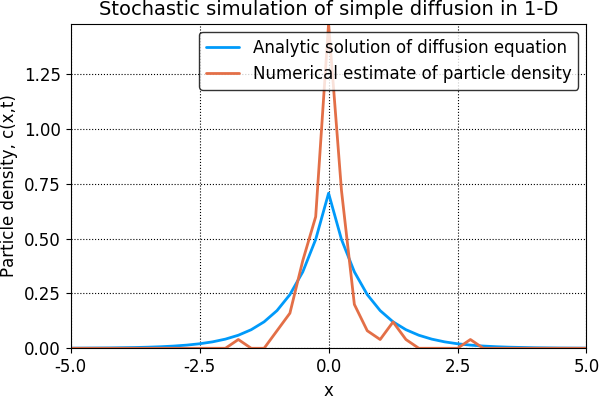

In [38]:
#1
L=25
N=100
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y =zeros(Int64,N)
D = 1.0
t=0.0

#draw the rates from an exponential distribution
Rates=randexp(2*N)*D
#calculate the total rate
totalRate=sum(Rates)
#scale the time 
dt = 1.0/totalRate

#build the list (needed to solve the interval membership problem)
KV_Rates=Array{KVPair}(2*N)

for i=1:2*N
    x=sum(Rates[1:i])
    KV_Rates[i]=KVPair(i,x)
end
Rates_list=buildLList(KV_Rates)


T=1.0

#This is the main loop
while t < T
   # Pick an event from the right range
    k = rand()*totalRate
    #solve the intervalmembership problem
    interval=intervalmembership(Rates_list,k)
    #find the corresponding interval key
      interval=interval.key
    #decide which way to hop and update the particle ID 
    if interval<=N
        hop = 1
        particleId = interval
    else
        hop = -1
        particleId=interval-N
    end
    Y[particleId]+=hop
    t+=dt
end

#Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end


# Calculate the theoretical density and compare
function normal(x, D, t)
    return (exp(-sqrt(2/D*t)*abs(x))/sqrt(2D*t))
end
P1 = normal(X, D, T)

plot(X, P1, label="Analytic solution of diffusion equation",linewidth=2)
plot!(X, P, label="Numerical estimate of particle density",xlim=(-5,5),linewidth=2)
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic simulation of simple diffusion in 1-D")

In order to measure the computational effort we embedd our process in the function "particle_linear", which takes N (number of particles) as an input argument. We want to see how our computational effort changes if we increase the particle number of particles.

In [87]:
function particle_linear(N::Int64)
#1
L=25
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y =zeros(Int64,N)
D = 1.0
t=0.0

#draw the rates from an exponential distribution
Rates=randexp(2*N)*D
#calculate the total rate
totalRate=sum(Rates)
#scale the time 
dt = 1.0/totalRate

#build the list (needed to solve the interval membership problem)
KV_Rates=Array{KVPair}(2*N)

for i=1:2*N
    x=sum(Rates[1:i])
    KV_Rates[i]=KVPair(i,x)
end
Rates_list=buildLList(KV_Rates)


T=1.0

#This is the main loop
while t < T
   # Pick an event from the right range
    k = rand()*totalRate
    #solve the intervalmembership problem
    interval=intervalmembership(Rates_list,k)
    #find the corresponding interval key
      interval=interval.key
    #decide which way to hop and update the particle ID 
    if interval<=N
        hop = 1
        particleId = interval
    else
        hop = -1
        particleId=interval-N
    end
    Y[particleId]+=hop
    t+=dt
end

#Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

end 

particle_linear (generic function with 1 method)


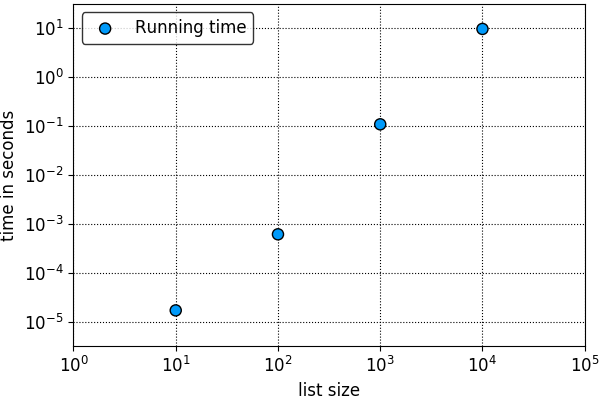

In [83]:
s=4
Time=zeros(s)
x=logspace(1,s,s)
counter=1
for i in x
    Time[counter] = (@timed  particle_linear(Int(i)))[2]
    counter=counter+1
end 
scatter(x,Time,markersize=8,label="Running time",xlabel="list size",ylabel="time in seconds",xscale=:log10,yscale=:log10,xlim=(10^0.5,10^(s+0.5)),ylim=(10^(-5.5),10^1.5))

In [85]:
#1
function particle_crap_tree()
L=10.0
N=100
Nx = 201
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y =zeros(Int64,N)
D = 1.0
t=0.0

Rates=randexp(2*N)*D
totalRate=sum(Rates)
dt = 1.0/totalRate
KV_Rates_tree=Array{KVPair}(2*N)

for i=1:2*N
    x=Rates[i]
    KV_Rates_tree[i]=KVPair(i,x)
end
Rates_list_tree=buildLList(KV_Rates)
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T, KV_Rates_tree)

# particle=rand()*totalRate

# intervalmembership(Rates_list,particle)


T=1.0

#This is the main loop
while t < T
#     # Pick an event
    k = rand()*totalRate
    interval=intervalmembership(Rates_list,k)
      interval=interval.key
    if interval<=N
        hop = 1
        particleId = interval
    else
        hop = -1
        particleId=interval-N
    end
    Y[particleId]+=hop
    t+=dt
end

#Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

end 
# Calculate the theoretical density and compare
function normal(x, D, t)
    return (1.0/sqrt(2.0*pi*D*t))*exp(-x*x/(2*D*t))
end
P1 = normal.(X, D, T)
plot(X, P1, label="Analytic solution of diffusion equation")
plot(X, P, label="Numerical estimate of particle density")
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic simulation of simple diffusion in 1-D")

LoadError: MethodError: no method matching size(::Nullable{FTree})[0m
Closest candidates are:
  size{N}(::Any, [1m[31m::Integer[0m, [1m[31m::Integer[0m, [1m[31m::Integer...[0m) at abstractarray.jl:48
  size([1m[31m::BitArray{1}[0m) at bitarray.jl:39
  size([1m[31m::BitArray{1}[0m, [1m[31m::Any[0m) at bitarray.jl:43
  ...[0m

In [86]:
a=@timed(particle_crap())[2]
b=@timed(particle_crap_tree())[2]
println(a-b)

LoadError: UndefVarError: particle_crap not defined